# Library

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Load Data

In [237]:
df = pd.read_csv('./dataset/student_data.csv', sep=';')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

C:\Users\TY NGOC\AppData\Local\Temp\ipykernel_15620\1098544195.py:2: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\TYNGOC\CNTT\A_Code\python\ds102\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


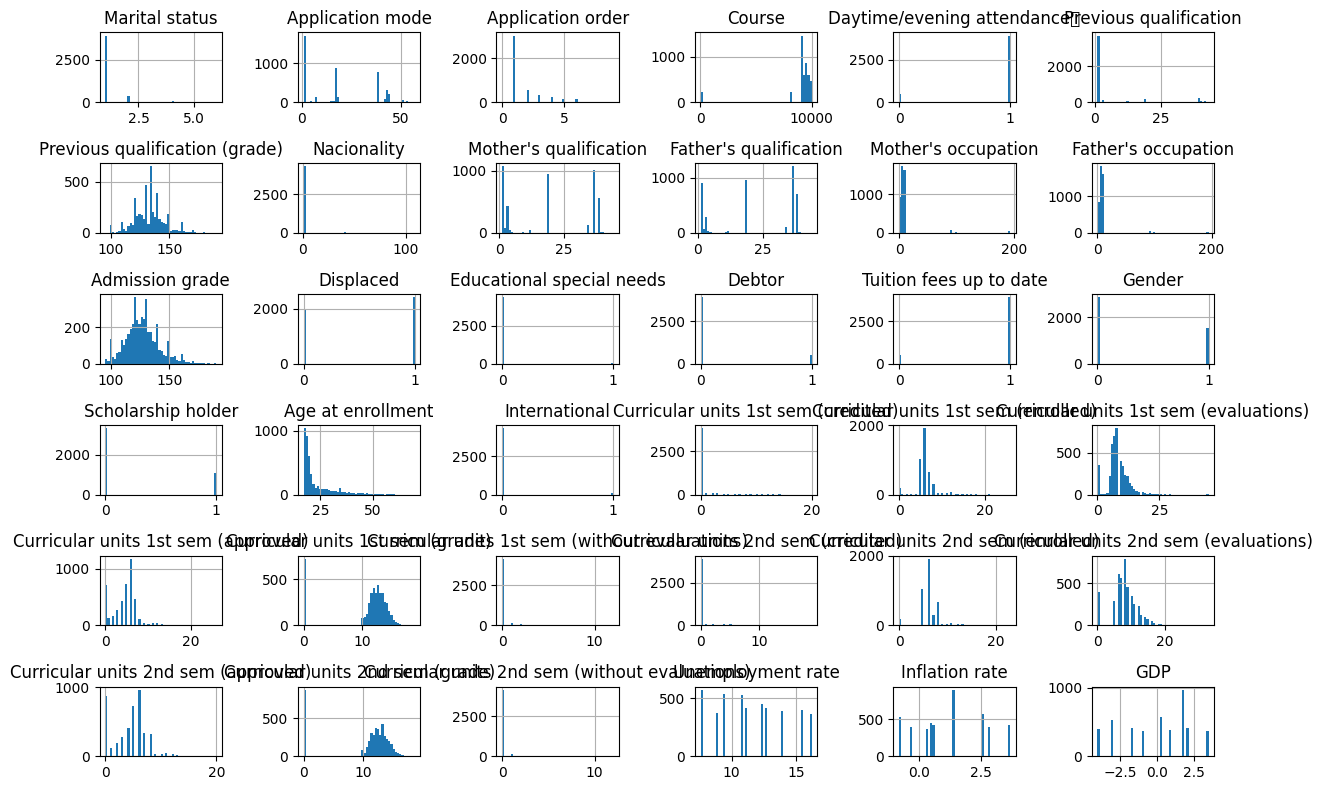

In [153]:
df.hist(bins=50, figsize=(12,8))
plt.tight_layout()
plt.show()

In [154]:
df.isna().sum(axis='index')

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [155]:
import seaborn as sns

num_cols = len(df.columns)
cov = np.zeros((num_cols, num_cols))

for i, col_name_i in enumerate(df.columns[:-1]):
    for j, col_name_j in enumerate(df.columns[:-1]):
        cov[i, j] = np.corrcoef(df[col_name_i].to_numpy(), df[col_name_j].to_numpy())[0, 1]

plt.figure(figsize=(100, 100)) 
plt.tight_layout()
sns.heatmap(cov, xticklabels=df.columns[:-1], yticklabels=df.columns[:-1], annot=True, cmap="coolwarm")

d:\TYNGOC\CNTT\A_Code\python\ds102\venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()


<Axes: >

d:\TYNGOC\CNTT\A_Code\python\ds102\venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
d:\TYNGOC\CNTT\A_Code\python\ds102\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


# Logistic Regression

In [238]:
def encoding(value):
    if value == "Enrolled" or value == "Dropout":
        return 0
    return 1

In [239]:
df['Target'] = df['Target'].apply(encoding)
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


In [ ]:
# def normalize_data(df, columns):
#     for column in columns:
#         mean = np.mean(df[column])
#         std = np.std(df[column])
#         if std != 0:
#             df[column] = (df[column] - mean) / std
#         else:
#             df[column] = df[column]
#     return df
# df.columns = df.columns.str.strip()
# columns = df.columns.difference(['Target'])
# normalized_df = normalize_data(df, columns=columns)
# normalized_df.sample(5)

In [240]:
normalized_df = (df - df.mean()) / df.std()
normalized_df['Target'] = df['Target']
normalized_df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,-0.294795,-0.095459,2.490614,-4.209044,0.350043,-0.350191,-0.804750,-0.126284,-0.036014,-0.669702,...,-0.28241,-2.838016,-2.042399,-1.471361,-1.963267,-0.199418,-0.287606,0.124372,0.765674,0
1,-0.294795,-0.209845,-0.554005,0.192559,0.350043,-0.350191,2.076585,-0.126284,-1.189625,-1.256285,...,-0.28241,-0.105714,-0.522623,0.518845,0.659487,-0.199418,0.876123,-1.105097,0.347160,1
2,-0.294795,-1.010546,2.490614,0.103393,0.350043,-0.350191,-0.804750,-0.126284,1.117596,0.959694,...,-0.28241,-0.105714,-2.042399,-1.471361,-1.963267,-0.199418,-0.287606,0.124372,0.765674,0
3,-0.294795,-0.095459,0.207150,0.444065,0.350043,-0.350191,-0.804750,-0.126284,1.181686,0.959694,...,-0.28241,-0.105714,0.490561,0.187144,0.416403,-0.199418,-0.813161,-1.466705,-1.375356,1
4,1.356059,1.162785,-0.554005,-0.408343,-2.856147,-0.350191,-2.472892,-0.126284,1.117596,1.024870,...,-0.28241,-0.105714,-0.522623,0.518845,0.531548,-0.199418,0.876123,-1.105097,0.347160,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,-0.294795,-1.010546,3.251769,0.444065,0.350043,-0.350191,-0.577276,-0.126284,-1.189625,-1.386637,...,-0.28241,-0.105714,-0.016031,0.187144,0.467578,-0.199418,1.476757,1.136876,-1.789464,1
4420,-0.294795,-1.010546,0.207150,0.444065,0.350043,-0.350191,-0.956399,14.914542,-1.189625,-1.386637,...,-0.28241,-0.105714,-0.522623,-0.807959,0.147730,-0.199418,-0.174987,-0.454201,0.889026,0
4421,-0.294795,-1.010546,-0.554005,0.311770,0.350043,-0.350191,1.621637,-0.126284,1.117596,0.959694,...,-0.28241,0.805053,0.237265,-1.139660,0.627502,-0.199418,0.876123,-1.105097,0.347160,0
4422,-0.294795,-1.010546,-0.554005,0.140707,0.350043,-0.350191,3.593077,-0.126284,1.117596,0.959694,...,-0.28241,-0.561098,-0.522623,0.187144,0.339639,-0.199418,-0.813161,-1.466705,-1.375356,1


In [241]:
X = normalized_df.iloc[:, :-1]
X.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,-0.294795,-0.095459,2.490614,-4.209044,0.350043,-0.350191,-0.804750,-0.126284,-0.036014,-0.669702,...,-0.199251,-0.28241,-2.838016,-2.042399,-1.471361,-1.963267,-0.199418,-0.287606,0.124372,0.765674
1,-0.294795,-0.209845,-0.554005,0.192559,0.350043,-0.350191,2.076585,-0.126284,-1.189625,-1.256285,...,-0.199251,-0.28241,-0.105714,-0.522623,0.518845,0.659487,-0.199418,0.876123,-1.105097,0.347160
2,-0.294795,-1.010546,2.490614,0.103393,0.350043,-0.350191,-0.804750,-0.126284,1.117596,0.959694,...,-0.199251,-0.28241,-0.105714,-2.042399,-1.471361,-1.963267,-0.199418,-0.287606,0.124372,0.765674
3,-0.294795,-0.095459,0.207150,0.444065,0.350043,-0.350191,-0.804750,-0.126284,1.181686,0.959694,...,-0.199251,-0.28241,-0.105714,0.490561,0.187144,0.416403,-0.199418,-0.813161,-1.466705,-1.375356
4,1.356059,1.162785,-0.554005,-0.408343,-2.856147,-0.350191,-2.472892,-0.126284,1.117596,1.024870,...,-0.199251,-0.28241,-0.105714,-0.522623,0.518845,0.531548,-0.199418,0.876123,-1.105097,0.347160


In [242]:
y = normalized_df.iloc[:, -1]
y.value_counts()

Target
0    2215
1    2209
Name: count, dtype: int64

In [243]:
X = X.to_numpy()
X.shape

(4424, 36)

In [244]:
y = y.to_numpy().reshape(-1, 1)
y.shape

(4424, 1)

In [245]:
class LogisticRegression:
    def __init__(self, epoch, lr):
        self.epoch = epoch
        self.lr = lr
        self.losses = []
        self.metrics = []
    
    def sigmoid(self, z):
        return 1/(1 + np.exp(-z))
    
    def loss_function(self, y, y_hat):
        return -(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)).mean()
    
    def accuracy(self, y, y_hat):
        return (1 - np.abs(y - y_hat)).mean()
    
    def fit(self, X, y):
        n = X.shape[0]
        d = X.shape[1]
        self.theta = np.zeros((d, 1))
        with tqdm(range(self.epoch)) as pb:
            for e in pb:
                # forward
                pb.set_description(f"Epoch {e+1}")
                y_hat = self.predict(X)
                # backward
                diff = y_hat - y
                gradient = 1/n * np.matmul(X.T, diff)
                self.theta -= self.lr * gradient
                # evaluate
                y_hat = self.predict(X)
                loss = self.loss_function(y, y_hat)
                acc = self.accuracy(y, y_hat)
                pb.set_postfix({
                    'Loss' : loss,
                    "Accuracy" : acc
                })
                self.losses.append(loss)
                self.metrics.append(acc)
                
    def predict(self, X):
        z = np.matmul(X, self.theta)
        y_hat = self.sigmoid(z)
        return y_hat

In [246]:
logis_reg = LogisticRegression(500, 0.5)

In [247]:
logis_reg.fit(X,y)

Epoch 500: 100%|██████████| 500/500 [00:02<00:00, 172.46it/s, Loss=0.353, Accuracy=0.778]


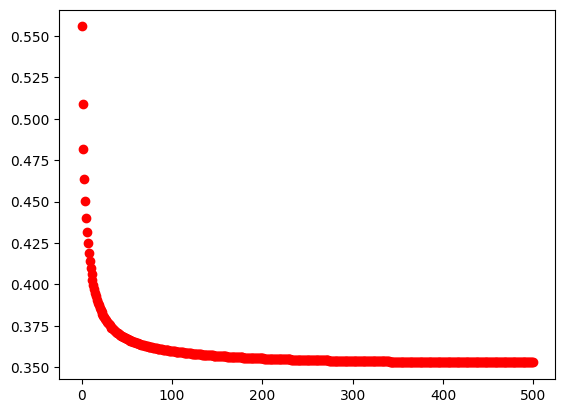

In [248]:
x_axis = np.array(range(500))
plt.scatter(x_axis, logis_reg.losses, c='r', label='loss')

# Softmax Regression

In [213]:
def encoding(value):
    if value == "Enrolled": return 0
    elif value == "Dropout": return 1 
    else: return 2

In [214]:
df['Target'] = df['Target'].apply(encoding)
df['Target'].value_counts()

Target
2    2209
1    1421
0     794
Name: count, dtype: int64

In [215]:
normalized_df = (df - df.mean()) / df.std()
normalized_df['Target'] = df['Target']
normalized_df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,-0.294795,-0.095459,2.490614,-4.209044,0.350043,-0.350191,-0.804750,-0.126284,-0.036014,-0.669702,...,-0.28241,-2.838016,-2.042399,-1.471361,-1.963267,-0.199418,-0.287606,0.124372,0.765674,1
1,-0.294795,-0.209845,-0.554005,0.192559,0.350043,-0.350191,2.076585,-0.126284,-1.189625,-1.256285,...,-0.28241,-0.105714,-0.522623,0.518845,0.659487,-0.199418,0.876123,-1.105097,0.347160,2
2,-0.294795,-1.010546,2.490614,0.103393,0.350043,-0.350191,-0.804750,-0.126284,1.117596,0.959694,...,-0.28241,-0.105714,-2.042399,-1.471361,-1.963267,-0.199418,-0.287606,0.124372,0.765674,1
3,-0.294795,-0.095459,0.207150,0.444065,0.350043,-0.350191,-0.804750,-0.126284,1.181686,0.959694,...,-0.28241,-0.105714,0.490561,0.187144,0.416403,-0.199418,-0.813161,-1.466705,-1.375356,2
4,1.356059,1.162785,-0.554005,-0.408343,-2.856147,-0.350191,-2.472892,-0.126284,1.117596,1.024870,...,-0.28241,-0.105714,-0.522623,0.518845,0.531548,-0.199418,0.876123,-1.105097,0.347160,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,-0.294795,-1.010546,3.251769,0.444065,0.350043,-0.350191,-0.577276,-0.126284,-1.189625,-1.386637,...,-0.28241,-0.105714,-0.016031,0.187144,0.467578,-0.199418,1.476757,1.136876,-1.789464,2
4420,-0.294795,-1.010546,0.207150,0.444065,0.350043,-0.350191,-0.956399,14.914542,-1.189625,-1.386637,...,-0.28241,-0.105714,-0.522623,-0.807959,0.147730,-0.199418,-0.174987,-0.454201,0.889026,1
4421,-0.294795,-1.010546,-0.554005,0.311770,0.350043,-0.350191,1.621637,-0.126284,1.117596,0.959694,...,-0.28241,0.805053,0.237265,-1.139660,0.627502,-0.199418,0.876123,-1.105097,0.347160,1
4422,-0.294795,-1.010546,-0.554005,0.140707,0.350043,-0.350191,3.593077,-0.126284,1.117596,0.959694,...,-0.28241,-0.561098,-0.522623,0.187144,0.339639,-0.199418,-0.813161,-1.466705,-1.375356,2


In [216]:
X = normalized_df.iloc[:, :-1]
X.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,-0.294795,-0.095459,2.490614,-4.209044,0.350043,-0.350191,-0.804750,-0.126284,-0.036014,-0.669702,...,-0.199251,-0.28241,-2.838016,-2.042399,-1.471361,-1.963267,-0.199418,-0.287606,0.124372,0.765674
1,-0.294795,-0.209845,-0.554005,0.192559,0.350043,-0.350191,2.076585,-0.126284,-1.189625,-1.256285,...,-0.199251,-0.28241,-0.105714,-0.522623,0.518845,0.659487,-0.199418,0.876123,-1.105097,0.347160
2,-0.294795,-1.010546,2.490614,0.103393,0.350043,-0.350191,-0.804750,-0.126284,1.117596,0.959694,...,-0.199251,-0.28241,-0.105714,-2.042399,-1.471361,-1.963267,-0.199418,-0.287606,0.124372,0.765674
3,-0.294795,-0.095459,0.207150,0.444065,0.350043,-0.350191,-0.804750,-0.126284,1.181686,0.959694,...,-0.199251,-0.28241,-0.105714,0.490561,0.187144,0.416403,-0.199418,-0.813161,-1.466705,-1.375356
4,1.356059,1.162785,-0.554005,-0.408343,-2.856147,-0.350191,-2.472892,-0.126284,1.117596,1.024870,...,-0.199251,-0.28241,-0.105714,-0.522623,0.518845,0.531548,-0.199418,0.876123,-1.105097,0.347160


In [217]:
y = normalized_df.iloc[:, -1]
y.value_counts()

Target
2    2209
1    1421
0     794
Name: count, dtype: int64

In [218]:
X = X.to_numpy()
X.shape

(4424, 36)

In [219]:
y = y.to_numpy().reshape(-1, 1)
y.shape

(4424, 1)

In [223]:
oh_y = np.zeros((y.shape[0], 3))
for i in range(y.shape[0]):
    oh_y[i, y[i]] = 1

In [230]:
class SoftmaxRegression:
    def __init__(self, epoch, lr):
        self.epoch = epoch
        self.lr = lr
        self.losses = []
        self.metrics = []
        
    def softmax(self, z):
        return np.exp(z) / np.sum(np.exp(z), axis=0)
    
    def loss_function(self, y, y_hat):
        return -((y*np.log(y_hat + 1e-6)).sum(axis=-1)).mean()
    
    def accuracy(self, y, y_hat):
        return (1 - np.abs(y - y_hat)).mean()
    
    def fit(self, X, y):
        n = X.shape[0]
        d = X.shape[1]
        n_classes = y.shape[-1]
        self.theta = np.zeros((d, n_classes))
        with tqdm(range(self.epoch)) as pb:
            for e in pb:
                pb.set_description(f"Epoch {e + 1}")
                s = self.predict(X)
                s_c = s - y
                gradient = 1/n * np.matmul(X.T, s_c)
                self.theta -= self.lr * gradient
                
                #evaluate
                s = self.predict(X)
                loss = self.loss_function(y, s)
                acc = self.accuracy(y.argmax(axis=-1), s.argmax(axis=-1))
                pb.set_postfix({
                    'Loss' : loss,
                    "Accuracy" : acc
                })
                self.losses.append(loss)
                self.metrics.append(acc)
                
    def predict(self, X):
        z = np.matmul(X, self.theta)
        y_hat = self.softmax(z)
        return y_hat

In [231]:
softmax_reg = SoftmaxRegression(200, 0.0001)
softmax_reg.fit(X, oh_y)

Epoch 200: 100%|██████████| 200/200 [00:01<00:00, 130.35it/s, Loss=8.38, Accuracy=0.608]


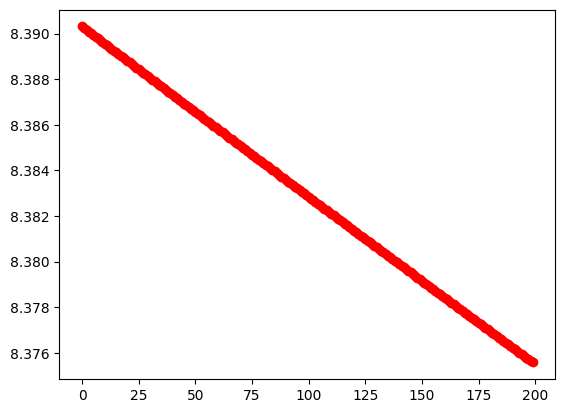

In [235]:
x_axis = np.array(range(200))
plt.scatter(x_axis, softmax_reg.losses, c='r', label='loss')

# Scikit-Learn

Logistic Regression Accuracy: 1.0000
Logistic Regression Loss: 0.0018


d:\TYNGOC\CNTT\A_Code\python\ds102\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\TYNGOC\CNTT\A_Code\python\ds102\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

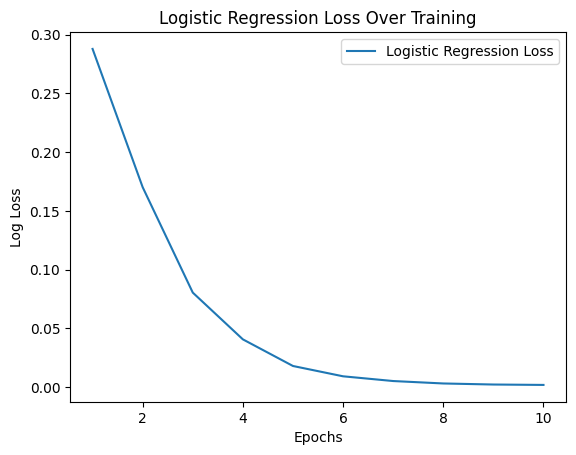

d:\TYNGOC\CNTT\A_Code\python\ds102\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\TYNGOC\CNTT\A_Code\python\ds102\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\TYNGOC\CNTT\A_Code\python\ds102\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative 

Softmax Regression Accuracy: 1.0000
Softmax Regression Loss: 0.0014


d:\TYNGOC\CNTT\A_Code\python\ds102\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\TYNGOC\CNTT\A_Code\python\ds102\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\TYNGOC\CNTT\A_Code\python\ds102\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO

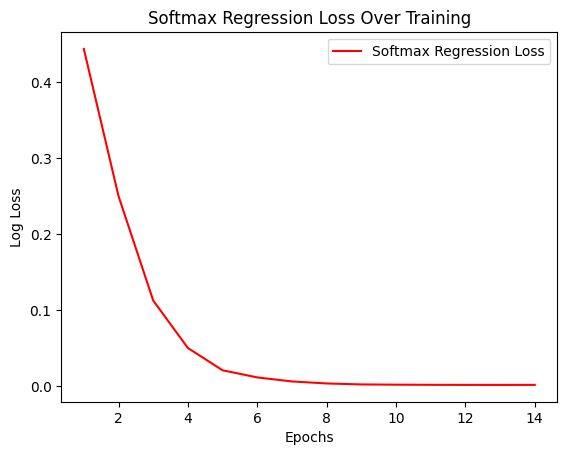

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss

data = pd.read_csv('./dataset/student_data.csv', sep=';')

label_mapping_binary = {'Graduate': 1, 'Dropout': 0, 'Enrolled': 0}  # Logistic Regression
label_mapping_multi = {'Graduate': 2, 'Dropout': 0, 'Enrolled': 1}  # Softmax Regression
if 'Target' in data.columns:
    data['Target_binary'] = data['Target'].map(label_mapping_binary)
    data['Target_multi'] = data['Target'].map(label_mapping_multi)

categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
one_hot = OneHotEncoder(drop='first')
categorical_encoded = one_hot.fit_transform(data[categorical_cols]).toarray()
categorical_encoded_df = pd.DataFrame(categorical_encoded, columns=one_hot.get_feature_names_out())
data = data.drop(columns=categorical_cols).reset_index(drop=True)
data = pd.concat([data, categorical_encoded_df], axis=1)

scaler = StandardScaler()
X = scaler.fit_transform(data.drop(columns=['Target_binary', 'Target_multi']))
y_binary = data['Target_binary'].values
y_multi = data['Target_multi'].values

# Chia tập train/test
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X, y_multi, test_size=0.2, random_state=42, stratify=y_multi)

# Logistic Regression với Sklearn và trực quan hóa hàm loss
log_reg = LogisticRegression(max_iter=2000, solver='lbfgs')
log_reg.fit(X_train, y_train_bin)
y_pred_bin = log_reg.predict(X_test)
y_prob_bin = log_reg.predict_proba(X_test)
loss_bin = log_loss(y_test_bin, y_prob_bin)
accuracy_bin = accuracy_score(y_test_bin, y_pred_bin)
print(f'Logistic Regression Accuracy: {accuracy_bin:.4f}')
print(f'Logistic Regression Loss: {loss_bin:.4f}')

# Lưu lại quá trình huấn luyện loss
losses_bin = []
for i in range(1, log_reg.n_iter_[0] + 1):
    log_reg_partial = LogisticRegression(max_iter=i, solver='lbfgs')
    log_reg_partial.fit(X_train, y_train_bin)
    y_prob_partial = log_reg_partial.predict_proba(X_test)
    loss_partial = log_loss(y_test_bin, y_prob_partial)
    losses_bin.append(loss_partial)

# Trực quan hóa loss theo số lần lặp
plt.plot(range(1, len(losses_bin) + 1), losses_bin, label='Logistic Regression Loss')
plt.xlabel("Epochs")
plt.ylabel("Log Loss")
plt.title("Logistic Regression Loss Over Training")
plt.legend()
plt.show()

# Softmax Regression với Sklearn và trực quan hóa hàm loss
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=2000)
softmax_reg.fit(X_train_multi, y_train_multi)
y_pred_multi = softmax_reg.predict(X_test_multi)
y_prob_multi = softmax_reg.predict_proba(X_test_multi)
loss_multi = log_loss(y_test_multi, y_prob_multi)
accuracy_multi = accuracy_score(y_test_multi, y_pred_multi)
print(f'Softmax Regression Accuracy: {accuracy_multi:.4f}')
print(f'Softmax Regression Loss: {loss_multi:.4f}')

# Lưu lại quá trình huấn luyện loss
losses_multi = []
for i in range(1, softmax_reg.n_iter_[0] + 1):
    softmax_partial = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=i)
    softmax_partial.fit(X_train_multi, y_train_multi)
    y_prob_partial = softmax_partial.predict_proba(X_test_multi)
    loss_partial = log_loss(y_test_multi, y_prob_partial)
    losses_multi.append(loss_partial)

# Trực quan hóa loss theo số lần lặp
plt.plot(range(1, len(losses_multi) + 1), losses_multi, label='Softmax Regression Loss', color='red')
plt.xlabel("Epochs")
plt.ylabel("Log Loss")
plt.title("Softmax Regression Loss Over Training")
plt.legend()
plt.show()
